### Lasso Regression

This week’s assignment involves running a lasso regression analysis. Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Explanatory variables can be either quantitative, categorical or both.

Your assignment is to run a lasso regression analysis using k-fold cross validation to identify a subset of predictors from a larger pool of predictor variables that best predicts a quantitative response variable.

### Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline 

rnd_state = 983

### Understand the data

In [2]:
data = pd.read_csv("data/bikes_rent.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


In [3]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [4]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
data.dropna(inplace=True)

In [7]:
data.iloc[:, :12].corrwith(data['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

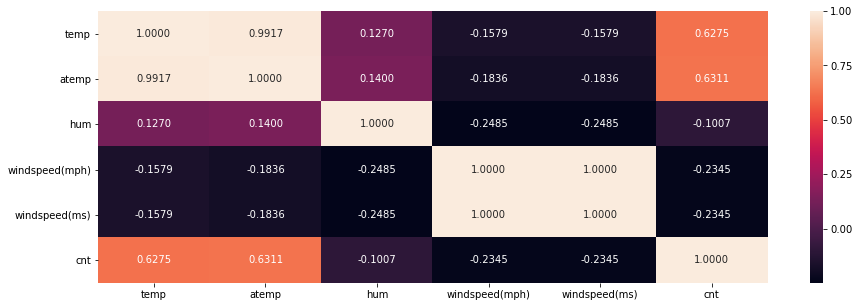

In [8]:
plt.figure(figsize=(15, 5))
sns.heatmap(data[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr(), annot=True, fmt='1.4f');

There is a strong correlation between temp and atemp, as well as windspeed(mph) and windspeed(ms) features, due to the fact that they represent similar metrics in different measures. In further analysis two of those features must be dropped or applyed with penalty (L2 or Lasso regression).

In [9]:
predictors = data.iloc[:, :12]
target = data['cnt']

In [10]:
(predictors_train, predictors_test,
 target_train, target_test) = train_test_split(predictors, target, test_size = .3, random_state = rnd_state)

In [11]:
model = LassoLarsCV(cv=10, precompute=False).fit(predictors_train, target_train)

In [12]:
dict(zip(predictors.columns, model.coef_))

{'atemp': 63.56915200306693,
 'holiday': -282.431748735072,
 'hum': -12.815264427009353,
 'mnth': 0.0,
 'season': 381.77762475080044,
 'temp': 58.035647703871234,
 'weathersit': -514.6381162101678,
 'weekday': 69.84812053893549,
 'windspeed(mph)': 0.0,
 'windspeed(ms)': -95.71090321577515,
 'workingday': 36.15135752613271,
 'yr': 2091.5182927517903}

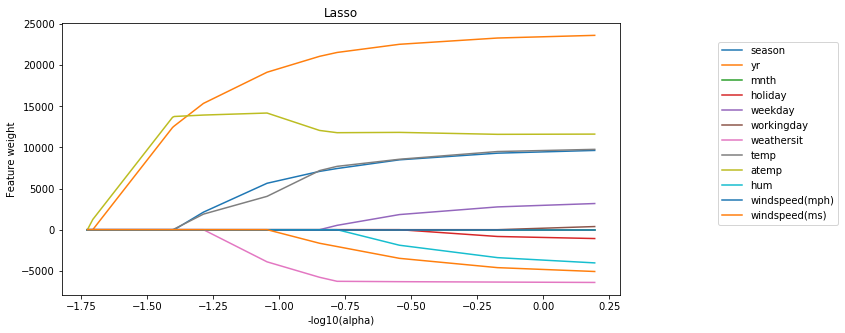

In [13]:
log_alphas = -np.log10(model.alphas_)
plt.figure(figsize=(10, 5))
for idx, feature in enumerate(predictors.columns):
    plt.plot(log_alphas, list(map(lambda r: r[idx], model.coef_path_.T)), label=feature)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("-log10(alpha)")
plt.ylabel("Feature weight")
plt.title("Lasso");

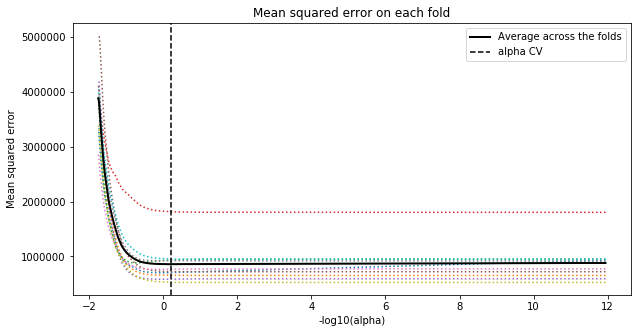

In [14]:
log_cv_alphas = -np.log10(model.cv_alphas_)
plt.figure(figsize=(10, 5))
plt.plot(log_cv_alphas, model.mse_path_, ':')
plt.plot(log_cv_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log10(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold');

In [16]:
rsquared_train = model.score(predictors_train, target_train)
rsquared_test = model.score(predictors_test, target_test)
print('Train data R-square', rsquared_train)
print('Test data R-square', rsquared_test)

Train data R-square 0.7899877818517489
Test data R-square 0.8131871527614188
